In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [31]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


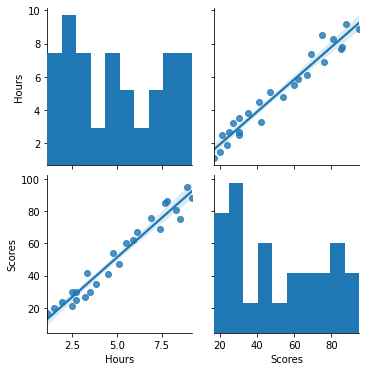

In [3]:
sb.pairplot(data=df,kind='reg')

In [4]:
X=df[['Hours']]
y=df[['Scores']]
(X)

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [5]:
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [6]:
lr=LinearRegression()

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [8]:
X_train

,Hours
4,3.5
2,3.2
20,2.7
6,9.2
7,5.5
22,3.8
1,5.1
16,2.5
0,2.5
15,8.9


In [9]:
X_test

,Hours
14,1.1
13,3.3
17,1.9
3,8.5
21,4.8
10,7.7
18,6.1
19,7.4


In [10]:
y_train

,Scores
4,30
2,27
20,30
6,88
7,60
22,35
1,47
16,30
0,21
15,95


In [11]:
y_test

,Scores
14,17
13,42
17,24
3,75
21,54
10,85
18,67
19,69


In [12]:

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred=lr.predict(X_test)

In [14]:
y_pred

array([[ 9.93952968],
       [32.84320126],
       [18.26813752],
       [86.97915227],
       [48.45934097],
       [78.65054442],
       [61.99332873],
       [75.52731648]])

In [15]:
y_pred_train=lr.predict(X_train)

In [16]:
y_pred_train

array([[34.92535322],
       [31.80212528],
       [26.59674537],
       [94.26668414],
       [55.74687284],
       [38.04858116],
       [51.58256892],
       [24.51459341],
       [24.51459341],
       [91.1434562 ],
       [79.6916204 ],
       [70.32193658],
       [26.59674537],
       [84.89700031],
       [45.33611303],
       [59.91117676],
       [14.1038336 ]])

In [17]:
MAE_train = metrics.mean_absolute_error(y_train,y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test ,y_pred)


print('MAE_train for the training dataset:',MAE_train)         
print('MAE_test for the test dataset:',MAE_test)   

MAE_train for the training dataset: 4.349384098544232
MAE_test for the test dataset: 7.169048271425507


In [18]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 4.5476105116908645
RMSE for test set is 7.489481350911204


In [19]:
print('Score for training data',lr.score(X_train,y_train))
print('Score for testing data',lr.score(X_test,y_test))

Score for training data 0.9681980033905908
Score for testing data 0.8933827573294114


In [20]:
d1=pd.DataFrame(data=y_test)
d1.columns=['Actual']
d1

,Actual
14,17
13,42
17,24
3,75
21,54
10,85
18,67
19,69


In [21]:
d1.reset_index(inplace=True)

In [22]:
d1

,index,Actual
0,14,17
1,13,42
2,17,24
3,3,75
4,21,54
5,10,85
6,18,67
7,19,69


In [23]:
d1.drop(columns='index',axis=1,inplace=True)

In [24]:
d1

,Actual
0,17
1,42
2,24
3,75
4,54
5,85
6,67
7,69


In [25]:
d2=pd.DataFrame(data=y_pred)
d2.columns=['Predicted']
d2

,Predicted
0,9.939530
1,32.843201
2,18.268138
3,86.979152
4,48.459341
5,78.650544
6,61.993329
7,75.527316


In [26]:
d=d1.join(d2)

In [28]:
d['error']=d['Actual']-d['Predicted']
d

,Actual,Predicted,error
0,17,9.939530,7.060470
1,42,32.843201,9.156799
2,24,18.268138,5.731862
3,75,86.979152,-11.979152
4,54,48.459341,5.540659
5,85,78.650544,6.349456
6,67,61.993329,5.006671
7,69,75.527316,-6.527316


In [29]:
d['error_%']=d['Actual']-d["Predicted"]/d['Actual'] * 100
d

,Actual,Predicted,error,error_%
0,17,9.939530,7.060470,-41.467822
1,42,32.843201,9.156799,-36.198098
2,24,18.268138,5.731862,-52.117240
3,75,86.979152,-11.979152,-40.972203
4,54,48.459341,5.540659,-35.739520
5,85,78.650544,6.349456,-7.530052
6,67,61.993329,5.006671,-25.527356
7,69,75.527316,-6.527316,-40.459879


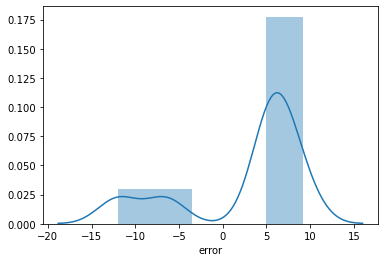

In [33]:
sb.distplot(d['error'])

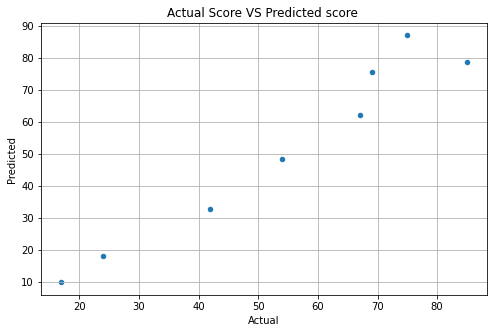

In [41]:
d.plot.scatter(x='Actual' , y ='Predicted',figsize=(8,5),grid=True,title='Actual Score VS Predicted score ')